In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **Nguồn dữ liệu**

In [2]:
df = pd.read_csv('C:\CODE\HeHoTroRaQuyetDinh\Fuel_Consumption_2000-2022.csv', header = 0, sep = ',')
# Link nguồn: https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption?resource=download

# **Bộ dữ liệu ban đầu**

In [3]:
df = pd.DataFrame(df)
df

YEAR   MAKE        MODEL  VEHICLE CLASS  ENGINE SIZE  CYLINDERS  \
0      2000  ACURA        1.6EL        COMPACT          1.6          4   
1      2000  ACURA        1.6EL        COMPACT          1.6          4   
2      2000  ACURA        3.2TL       MID-SIZE          3.2          6   
3      2000  ACURA        3.5RL       MID-SIZE          3.5          6   
4      2000  ACURA      INTEGRA     SUBCOMPACT          1.8          4   
...     ...    ...          ...            ...          ...        ...   
22551  2022  Volvo  XC40 T5 AWD     SUV: Small          2.0          4   
22552  2022  Volvo  XC60 B5 AWD     SUV: Small          2.0          4   
22553  2022  Volvo  XC60 B6 AWD     SUV: Small          2.0          4   
22554  2022  Volvo  XC90 T5 AWD  SUV: Standard          2.0          4   
22555  2022  Volvo  XC90 T6 AWD  SUV: Standard          2.0          4   

      TRANSMISSION FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  \
0               A4    X               9.2             6.7              8.1   
1               M5    X               8.5             6.5              7.6   
2              AS5    Z              12.2             7.4             10.0   
3               A4    Z              13.4             9.2             11.5   
4               A4    X              10.0             7.0              8.6   
...            ...  ...               ...             ...              ...   
22551          AS8    Z              10.7             7.7              9.4   
22552          AS8    Z              10.5             8.1              9.4   
22553          AS8    Z              11.0             8.7              9.9   
22554          AS8    Z              11.5             8.4             10.1   
22555          AS8    Z              12.4             8.9             10.8   

       COMB (mpg)  EMISSIONS  
0              35        186  
1              37        175  
2              28        230  
3              25        264  
4              33        198  
...           ...        ...  
22551          30        219  
22552          30        219  
22553          29        232  
22554          28        236  
22555          26        252  

[22556 rows x 13 columns]

Mô tả các biến:

YEAR : năm sản xuất xe

MAKE : tên hãng sản xuất xe hay thương hiệu của xe

MODEL : tên hoặc mã của của mẫu xe cụ thể

VEHICLE CLASS : phân loại xe dựa trên kích thước và chức năng

ENGINE SIZE : dung tích của động cơ tính bằng lít (L)

CYLINDERS : số lượng xi lanh trong động cơ của xe

TRANSMISSION : loại hộp số của xe

FUEL	: loại nhiên liệu mà xe sử dụng

FUEL CONSUMPTION	: mức tiêu thụ nhiên liệu của xe trong đô thị, ngoài đô thị và kết hợp, được đo bằng lít trên 100 km (L/100 km)

HWY (L/100 km)	: mức tiêu thụ nhiên liệu của xe trên  xa lộ tính bằng lít trên 100 km

COMB (L/100 km) : mức tiêu thụ nhiên liệu trung bình của xe trong cả đô thị và trên xa lộ  được tính bằng lít trên 100 km.

COMB (mpg)	: mức tiêu thụ nhiên liệu trung bình của xe trong cả đô thị và trên xa lộ  được tính bằng dặm trên gallon.

EMISSIONS : lượng khí thải CO2 của xe, tính bằng gam trên km (g/km).

biến mục tiêu : FUEL CONSUMPTION

biến độc lập:

- biến phân loại: MAKE, MODEL, VEHICLE CLASS, TRANSMISSION, FUEL

- biến định lượng: YEAR, ENGINE SIZE, CYLINDERS, HWY (L/100 km), COMB (L/100 km), COMB (mpg), EMISSIONS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


Kích thước bộ dữ liệu 

In [5]:
import os
file_input = 'C:\CODE\HeHoTroRaQuyetDinh\Fuel_Consumption_2000-2022.csv'
file_size = os.path.getsize(file_input)
# Chuyển đổi sang MB
file_size_mb = file_size / (1024 ** 2)
print(f'Kích thước file dữ liệu đầu vào: {file_size_mb:.2f} MB')

Kích thước file dữ liệu đầu vào: 1.50 MB


# **1. Tiền xử lý dữ liệu**

### 1.1. Chuyển đổi định dạng

In [6]:
df.dtypes

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

kiểu dữ liệu của các cột đã đúng định dạng nên không chỉnh sửa

### 1.2. Xử lý giá trị còn thiếu (null/nan)

##### Thống kê số lượng giá trị còn thiếu ở mỗi cột

In [7]:
null_counts_each_column = df.isnull().sum()
null_counts_each_column

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

nhận xét: các cột không có giá trị còn thiếu nào

### 1.3. Xử lý giá trị ngoại lệ

##### 1.3.1. Phát hiện giá trị ngoại lệ của mỗi cột bằng biểu đồ hộp (Box plot) đối với biến định lượng và biến mục tiêu

In [8]:
df_numberical = df.copy()
df_numberical = df_numberical.select_dtypes(include=['int64', 'float64'])
df_numberical

YEAR  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  HWY (L/100 km)  \
0      2000          1.6          4               9.2             6.7   
1      2000          1.6          4               8.5             6.5   
2      2000          3.2          6              12.2             7.4   
3      2000          3.5          6              13.4             9.2   
4      2000          1.8          4              10.0             7.0   
...     ...          ...        ...               ...             ...   
22551  2022          2.0          4              10.7             7.7   
22552  2022          2.0          4              10.5             8.1   
22553  2022          2.0          4              11.0             8.7   
22554  2022          2.0          4              11.5             8.4   
22555  2022          2.0          4              12.4             8.9   

       COMB (L/100 km)  COMB (mpg)  EMISSIONS  
0                  8.1          35        186  
1                  7.6          37        175  
2                 10.0          28        230  
3                 11.5          25        264  
4                  8.6          33        198  
...                ...         ...        ...  
22551              9.4          30        219  
22552              9.4          30        219  
22553              9.9          29        232  
22554             10.1          28        236  
22555             10.8          26        252  

[22556 rows x 8 columns]

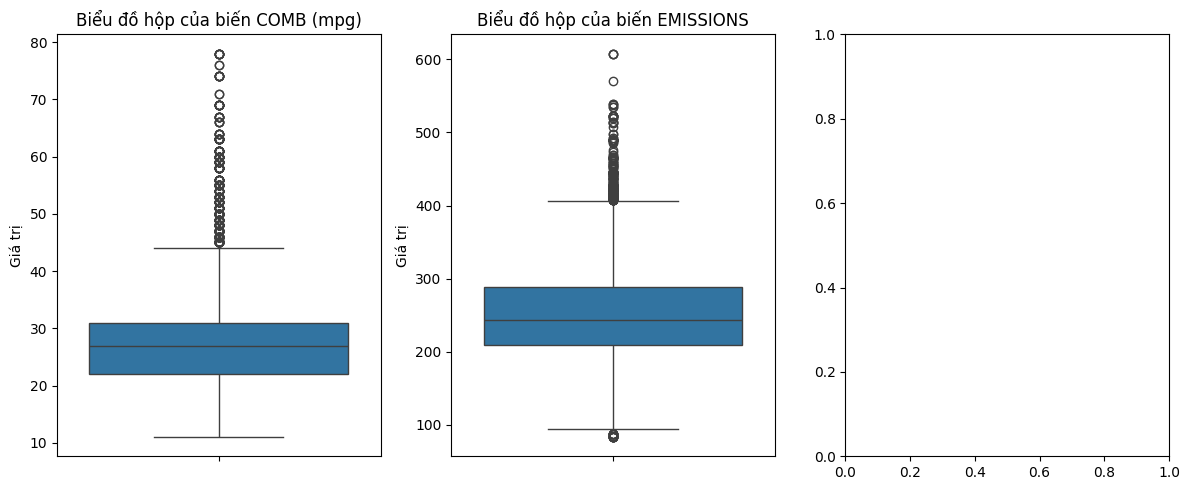

In [9]:
num_cols = len(df_numberical.columns)
num_pairs = num_cols // 3  # Số lượng cặp cột

# Nếu số lượng cột không chia hết cho 3, cần tăng số lượng cặp cột lên 1
if num_cols % 3 != 0:
    num_pairs += 1

for i in range(num_pairs):
    # Tạo subplot cho mỗi cặp cột
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

    # Vẽ biểu đồ boxplot cho cột thứ nhất trong cặp
    col_index = i * 3
    if col_index < num_cols:
        sns.boxplot(y=df_numberical.iloc[:, col_index], ax=axs[0])
        axs[0].set_title(f'Biểu đồ hộp của biến {df_numberical.columns[col_index]}')
        axs[0].set_ylabel('Giá trị')

    # Vẽ biểu đồ boxplot cho cột thứ hai trong cặp
    col_index = i * 3 + 1
    if col_index < num_cols:
        sns.boxplot(y=df_numberical.iloc[:, col_index], ax=axs[1])
        axs[1].set_title(f'Biểu đồ hộp của biến {df_numberical.columns[col_index]}')
        axs[1].set_ylabel('Giá trị')

    # Vẽ biểu đồ boxplot cho cột thứ ba trong cặp
    col_index = i * 3 + 2
    if col_index < num_cols:
        sns.boxplot(y=df_numberical.iloc[:, col_index], ax=axs[2])
        axs[2].set_title(f'Biểu đồ hộp của biến {df_numberical.columns[col_index]}')
        axs[2].set_ylabel('Giá trị')

    plt.tight_layout()
    plt.show()

##### 1.3.2. Phát hiện giá trị ngoại lệ của mỗi cột bằng biểu đồ hộp (Box plot) đối với biến phân loại

In [10]:
df_categorical = df.copy()
df_categorical = df_categorical.select_dtypes(include=['object'])
df_categorical

MAKE        MODEL  VEHICLE CLASS TRANSMISSION FUEL
0      ACURA        1.6EL        COMPACT           A4    X
1      ACURA        1.6EL        COMPACT           M5    X
2      ACURA        3.2TL       MID-SIZE          AS5    Z
3      ACURA        3.5RL       MID-SIZE           A4    Z
4      ACURA      INTEGRA     SUBCOMPACT           A4    X
...      ...          ...            ...          ...  ...
22551  Volvo  XC40 T5 AWD     SUV: Small          AS8    Z
22552  Volvo  XC60 B5 AWD     SUV: Small          AS8    Z
22553  Volvo  XC60 B6 AWD     SUV: Small          AS8    Z
22554  Volvo  XC90 T5 AWD  SUV: Standard          AS8    Z
22555  Volvo  XC90 T6 AWD  SUV: Standard          AS8    Z

[22556 rows x 5 columns]

In [11]:
import re
# Hàm xử lý giá trị trùng lặp
def Clean(value):
    text = re.sub('[^a-zA-Z]',' ',value) # thay thế dấu câu bằng dấu cách
    text = text.lower() # chuyển chữ hoa về chữ thường
    text = text.split()
    text = ' '.join(text)
    return text

df_clean_categorical = df_categorical.copy()

for column in df_categorical.columns:
    if column != 'TRANSMISSION':
        df_clean_categorical[column] = df_clean_categorical[column].apply(Clean)
        unique_values = df_clean_categorical[column].unique()
        num_unique_values = len(unique_values)
        print(f"Cột {column} có {num_unique_values} giá trị duy nhất\n")
    else:
        unique_values = df_clean_categorical[column].unique()
        num_unique_values = len(unique_values)
        print(f"Cột {column} có {num_unique_values} giá trị duy nhất\n")
    

Cột MAKE có 52 giá trị duy nhất

Cột MODEL có 2743 giá trị duy nhất

Cột VEHICLE CLASS có 17 giá trị duy nhất

Cột TRANSMISSION có 30 giá trị duy nhất

Cột FUEL có 5 giá trị duy nhất



Xử lý giá trị ngoại lệ đối với biến MAKE, VEHICLE CLASS

In [12]:
# Top những giá trị xuất hiện nhiều nhất của các biến phân loại
top = 7

dict_column_top = {}

for column in ['MAKE', 'VEHICLE CLASS', 'TRANSMISSION']:
    value_counts = df_clean_categorical[column].value_counts()
    top_values = value_counts.head(top)
    dict_column_top[column] = top_values.index.tolist()
    # Thay thế các giá trị không nằm trong top bằng 'Other'
    df_clean_categorical[column] = df_clean_categorical[column].where(df_clean_categorical[column].isin(top_values.index), 'Other')
    # In ra các giá trị duy nhất trong cột sau khi đã thay thế
    unique_values = df_clean_categorical[column].unique()
    print(f'Các giá trị khác nhau trong cột {column}: \n {unique_values}')


Các giá trị khác nhau trong cột MAKE: 
 ['Other' 'bmw' 'chevrolet' 'ford' 'gmc' 'mercedes benz' 'porsche' 'toyota']
Các giá trị khác nhau trong cột VEHICLE CLASS: 
 ['compact' 'mid size' 'subcompact' 'Other' 'full size' 'suv'
 'pickup truck standard' 'suv small']
Các giá trị khác nhau trong cột TRANSMISSION: 
 ['A4' 'M5' 'Other' 'M6' 'A5' 'AS6' 'A6' 'AS8']


Loại bỏ cột MODEL

In [13]:
df_clean_categorical = df_clean_categorical.drop(columns=['MODEL'])
df_clean_categorical

MAKE VEHICLE CLASS TRANSMISSION FUEL
0      Other       compact           A4    x
1      Other       compact           M5    x
2      Other      mid size        Other    z
3      Other      mid size           A4    z
4      Other    subcompact           A4    x
...      ...           ...          ...  ...
22551  Other     suv small          AS8    z
22552  Other     suv small          AS8    z
22553  Other     suv small          AS8    z
22554  Other         Other          AS8    z
22555  Other         Other          AS8    z

[22556 rows x 4 columns]

In [14]:
df = pd.concat([df_numberical, df_clean_categorical], axis=1)
df.head()

YEAR  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  HWY (L/100 km)  \
0  2000          1.6          4               9.2             6.7   
1  2000          1.6          4               8.5             6.5   
2  2000          3.2          6              12.2             7.4   
3  2000          3.5          6              13.4             9.2   
4  2000          1.8          4              10.0             7.0   

   COMB (L/100 km)  COMB (mpg)  EMISSIONS   MAKE VEHICLE CLASS TRANSMISSION  \
0              8.1          35        186  Other       compact           A4   
1              7.6          37        175  Other       compact           M5   
2             10.0          28        230  Other      mid size        Other   
3             11.5          25        264  Other      mid size           A4   
4              8.6          33        198  Other    subcompact           A4   

  FUEL  
0    x  
1    x  
2    z  
3    z  
4    x

# **2. Khám phá dữ liệu**

### 2.1. Mô tả thống kê

In [ ]:
df.describe()

### 2.2. Thống kê số lượng xe qua các năm ở Canada
biến YEAR

In [ ]:
plt.figure(figsize=(10, 4))

# Đếm số lượng theo từng năm
degrog_counts = df['YEAR'].value_counts().sort_index()

plt.figure(figsize=(15, 5))
plt.bar(degrog_counts.index, degrog_counts.values, color='green')

plt.title('Thống kê số lượng xe qua các năm ở Canada\n')
plt.xlabel('Năm')
plt.ylabel('Số lượng xe')
plt.grid(False)
plt.xticks(np.arange(degrog_counts.index.min(), degrog_counts.index.max() + 1, 1), rotation=45)
plt.yticks(np.arange(0, degrog_counts.values.max() + 500, 500))

plt.savefig('pictures/Thống kê số lượng xe qua các năm ở Canada.png')
plt.show()


### 2.3. Thống kê các thương hiệu xe nổi tiếng ở Canada
biến MAKE

In [ ]:
# Đếm số lượng theo từng thương hiệu
degrog_counts = df['MAKE'].value_counts()
# Loại bỏ các giá trị "Other"
degrog_counts = degrog_counts[degrog_counts.index != 'other']
# Tạo biểu đồ cột nằm ngang
plt.figure(figsize=(10, 4))
plt.barh(degrog_counts.index, degrog_counts.values, color='green')
plt.title('Thống kê các thương hiệu xe nổi tiếng ở Canada\n')
plt.xlabel('Số lượng xe')
plt.ylabel('Thương hiệu')
plt.savefig('pictures/Thống kê các thương hiệu xe nổi tiếng ở Canada.png')
plt.show()

### 2.4. Phân phối dung tích của động cơ
biến ENGINE SIZE

In [ ]:
plt.figure(figsize=(10, 5))
a = sns.histplot(df['ENGINE SIZE'], bins=20, color='purple', edgecolor='black', kde=True)
a.lines[0].set_color('black')
plt.title('Phân phối dung tích của động cơ\n')
plt.xlabel('\nLít')
plt.ylabel('Số lượng xe\n')
plt.grid(False)
plt.savefig('pictures/Phân phối dung tích của động cơ.png')
plt.show()

### 2.5. Thống kê số lượng xi lanh trong động cơ của xe
biến CYLINDERS

In [ ]:
degrog_counts = df['CYLINDERS'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(degrog_counts.index, degrog_counts.values, marker='o', linestyle='-', color='red')

plt.title('Thống kê số lượng xi lanh trong động cơ của xe\n')
plt.xlabel('\nSố lượng xi lanh')
plt.ylabel('Số lượng xe\n')
plt.grid(False)
plt.xticks(np.arange(0, 20, 1))
plt.yticks(np.arange(0, 9500, 500))

for x, y in zip(degrog_counts.index, degrog_counts.values):
    plt.text(x+0.5, y+50, f'{y}', ha='center', va='bottom')

plt.savefig('pictures/Thống kê số lượng xi lanh trong động cơ của xe.png')
plt.show()

### 2.6. Phân phối mức tiêu thụ nhiên liệu của xe trên quãng đường đi
biến FUEL CONSUMPTION

In [ ]:
plt.figure(figsize=(10, 5))
a = sns.histplot(df['FUEL CONSUMPTION'], bins=20, color='orange', edgecolor='black', kde=True)
a.lines[0].set_color('black')
plt.title('Phân phối mức tiêu thụ nhiên liệu của xe trên quãng đường đi\n')
plt.xlabel('\nL/100 km')
plt.ylabel('Số lượng xe\n')
plt.grid(False)
plt.savefig('pictures/Phân phối mức tiêu thụ nhiên liệu của xe trên quãng đường đi.png')
plt.show()

### 2.7. Phân phối mức tiêu thụ nhiên liệu của xe trên đoạn đường cao tốc
biến    

In [ ]:
plt.figure(figsize=(10, 5))
a = sns.histplot(df['HWY (L/100 km)'], bins=20, color='skyblue', edgecolor='black', kde=True)
a.lines[0].set_color('black')
plt.title('Phân phối mức tiêu thụ nhiên liệu của xe trên đoạn đường cao tốc\n')
plt.xlabel('\nL/100 km')
plt.ylabel('Số lượng xe\n')
plt.grid(False)
plt.savefig('pictures/Phân phối mức tiêu thụ nhiên liệu của xe trên đoạn đường cao tốc.png')
plt.show()

### 2.8. Phân phối mức tiêu thụ nhiên liệu trung bình của xe trên đoạn đường cao tốc và trong thành phố tính bằng đơn vị L/100 km
biến COMB (L/100 km)

In [ ]:
plt.figure(figsize=(10, 5))
a = sns.histplot(df['COMB (L/100 km)'], bins=20, color='red', edgecolor='black', kde=True)
a.lines[0].set_color('black')
plt.title('Phân phối mức tiêu thụ nhiên liệu của xe trên đoạn đường cao tốc và trong thành phố tính bằng đơn vị L/100 km\n')
plt.xlabel('\nL/100 km')
plt.ylabel('Số lượng xe\n')
plt.grid(False)
plt.savefig('pictures/Phân phối mức tiêu thụ nhiên liệu của xe trên đoạn đường cao tốc và trong thành phố tính bằng đơn vị lít trên 100 km.png')
plt.show()

### 2.9. Phân phối mức tiêu thụ nhiên liệu trung bình của xe trên đoạn đường cao tốc và trong thành phố tính bằng đơn vị mpg
biến COMB (mpg)

In [ ]:
plt.figure(figsize=(10, 5))
a = sns.histplot(df['COMB (mpg)'], bins=20, color='red', edgecolor='black', kde=True)
a.lines[0].set_color('black')
plt.title('Phân phối mức tiêu thụ nhiên liệu của xe trên đoạn đường cao tốc và trong thành phố tính bằng đơn vị mpg\n')
plt.xlabel('\nmpg')
plt.ylabel('Số lượng xe\n')
plt.grid(False)
plt.savefig('pictures/Phân phối mức tiêu thụ nhiên liệu của xe trên đoạn đường cao tốc và trong thành phố tính bằng đơn vị mpg.png')
plt.show()

### 2.10. Phân phối lượng khí thải CO2 từ phương tiện
biến EMISSIONS

In [ ]:
plt.figure(figsize=(10, 5))
a = sns.histplot(df['EMISSIONS'], bins=20, color='yellow', edgecolor='black', kde=True)
a.lines[0].set_color('black')
plt.title('Phân phối lượng khí thải CO2 từ phương tiện\n')
plt.xlabel('\ng/km')
plt.ylabel('Số lượng xe\n')
plt.grid(False)
plt.savefig('pictures/Phân phối lượng khí thải CO2 từ phương tiện.png')
plt.show()

### 2.11. Thống kê số lượng xe theo phân loại
biến VEHICLE CLASS

In [ ]:
# Tính toán số lượng mỗi loại xe
vehicle_counts = df['VEHICLE CLASS'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 8))
plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Thống kê số lượng xe theo phân loại')
plt.savefig('pictures/Thống kê số lượng xe theo phân loại.png')
plt.show()

### 2.12. Thống kê số lượng xe theo hộp số 
biến TRANSMISSION

In [ ]:
# Tính toán số lượng mỗi loại xe
transmission_counts = df['TRANSMISSION'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 8))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Thống kê số lượng xe theo hộp số')
plt.savefig('pictures/Thống kê số lượng xe theo hộp số.png')
plt.show()

### 2.13. Thống kê loại nhiên liệu mà xe sử dụng
biến FUEL

In [ ]:
plt.figure(figsize=(10, 4))

# Đếm số lượng xe theo loại nhiên liệu
feul_counts = df['FUEL'].value_counts().sort_index()

plt.figure(figsize=(15, 5))
plt.bar(degrog_counts.index, degrog_counts.values, color='green')

plt.title('Thống kê loại nhiên liệu mà xe sử dụng\n')
plt.xlabel('Loại nhiên liệu')
plt.ylabel('Số lượng xe\n')
plt.grid(False)
plt.xticks(np.arange(degrog_counts.index.min(), degrog_counts.index.max() + 1, 1), rotation=45)
plt.yticks(np.arange(0, degrog_counts.values.max() + 500, 500))

plt.savefig('pictures/Thống kê loại nhiên liệu mà xe sử dụng.png')

plt.show()

### 2.14. Ma trận tương quan giữa các biến

In [ ]:
# Đưa giá trị của biến phân loại về dạng số
df_heatmap = df.copy()
df_heatmap['MAKE'] = df_heatmap['MAKE'].map({
    'Other': 0,
    'bmw': 1,
    'chevrolet': 2,
    'ford': 3,
    'gmc': 4,
    'mercedes benz': 5,
    'porsche': 6,
    'toyota': 7
})
df_heatmap['VEHICLE CLASS'] = df_heatmap['VEHICLE CLASS'].map({
    'Other': 0,
    'compact': 1,
    'mid size': 2,
    'full size': 3,
    'suv': 4,
    'pickup truck standard': 5,
    'suv small': 6,
    'subcompact': 7
})
df_heatmap['TRANSMISSION'] = df_heatmap['TRANSMISSION'].map({
    'Other': 0,
    'A4': 1,
    'M5': 2,
    'M6': 3,
    'A5': 4,
    'AS6': 5,
    'A6': 6,
    'AS8': 7
})
df_heatmap['FUEL'] = df_heatmap['FUEL'].map({
    'x': 0,
    'z': 1,
    'e': 2,
    'n': 3,
    'd': 4
})
df_heatmap

In [ ]:
# Tạo biểu đồ ma trận tương quan
correlation_matrix = df_heatmap[['YEAR','ENGINE SIZE','CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS', 'MAKE', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='RdPu',fmt=".2f", linewidths=0.7)
plt.title('Ma trận tương quan giữa các biến\n',fontsize=18)
plt.savefig('pictures/Biểu đồ ma trận tương quan giữa các biến.png')
plt.show()

<!-- Các giá trị khác nhau trong cột MAKE: 
 ['Other' 'bmw' 'chevrolet' 'ford' 'gmc' 'mercedes benz' 'porsche' 'toyota']
Các giá trị khác nhau trong cột VEHICLE CLASS: 
 ['compact' 'mid size' 'subcompact' 'Other' 'full size' 'suv'
 'pickup truck standard' 'suv small']
Các giá trị khác nhau trong cột TRANSMISSION: 
 ['A4' 'M5' 'Other' 'M6' 'A5' 'AS6' 'A6' 'AS8'] -->

# **3. Huấn luyện mô hình**

In [15]:
# Lấy 10 dòng ngẫu nhiên từ df
random_rows = df.sample(n=10)
random_rows

YEAR  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  HWY (L/100 km)  \
16158  2016          4.0          8              14.5            10.8   
2229   2003          2.0          4              10.5             8.4   
7861   2008          2.5          5              10.7             7.0   
9381   2010          3.7          5              13.3             9.3   
1700   2002          2.4          4              10.6             8.2   
21894  2022          2.0          4              11.6             8.5   
7297   2008          3.5          6              11.0             6.9   
15527  2016          4.4          8              16.6            12.1   
2179   2003          5.3          8              16.9            12.0   
10592  2011          5.0          8              13.1             8.2   

       COMB (L/100 km)  COMB (mpg)  EMISSIONS           MAKE VEHICLE CLASS  \
16158             12.8          22        303  mercedes benz         Other   
2229               9.6          29        221      chevrolet           suv   
7861               9.0          31        207          Other       compact   
9381              11.5          25        264            gmc         Other   
1700               9.5          30        218          Other           suv   
21894             10.2          28        239           ford     suv small   
7297               9.2          31        212          Other       compact   
15527             14.6          19        343            bmw         Other   
2179              14.7          19        338      chevrolet           suv   
10592             11.0          26        253          Other     full size   

      TRANSMISSION FUEL  
16158        Other    z  
2229            M5    x  
7861            M6    z  
9381            A4    x  
1700            A4    x  
21894          AS8    x  
7297            A5    x  
15527          AS8    z  
2179            A4    x  
10592           A6    z

In [16]:
# Lưu chỉ số của 10 dòng ngẫu nhiên trên
indices_to_drop = random_rows.index

# Loại bỏ 10 hàng này khỏi df 
df_dropped = df.drop(indices_to_drop)
df = df_dropped
df

YEAR  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  HWY (L/100 km)  \
0      2000          1.6          4               9.2             6.7   
1      2000          1.6          4               8.5             6.5   
2      2000          3.2          6              12.2             7.4   
3      2000          3.5          6              13.4             9.2   
4      2000          1.8          4              10.0             7.0   
...     ...          ...        ...               ...             ...   
22551  2022          2.0          4              10.7             7.7   
22552  2022          2.0          4              10.5             8.1   
22553  2022          2.0          4              11.0             8.7   
22554  2022          2.0          4              11.5             8.4   
22555  2022          2.0          4              12.4             8.9   

       COMB (L/100 km)  COMB (mpg)  EMISSIONS   MAKE VEHICLE CLASS  \
0                  8.1          35        186  Other       compact   
1                  7.6          37        175  Other       compact   
2                 10.0          28        230  Other      mid size   
3                 11.5          25        264  Other      mid size   
4                  8.6          33        198  Other    subcompact   
...                ...         ...        ...    ...           ...   
22551              9.4          30        219  Other     suv small   
22552              9.4          30        219  Other     suv small   
22553              9.9          29        232  Other     suv small   
22554             10.1          28        236  Other         Other   
22555             10.8          26        252  Other         Other   

      TRANSMISSION FUEL  
0               A4    x  
1               M5    x  
2            Other    z  
3               A4    z  
4               A4    x  
...            ...  ...  
22551          AS8    z  
22552          AS8    z  
22553          AS8    z  
22554          AS8    z  
22555          AS8    z  

[22546 rows x 12 columns]

### Chọn một số đặc trưng để huấn luyện

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
cdf = df[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)','EMISSIONS']]

X = cdf.drop(['FUEL CONSUMPTION'], axis=1)
y = cdf['FUEL CONSUMPTION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

### Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

# Huấn luyện mô hình với Linear regression và cross-validation trên tập huấn luyện
lr = LinearRegression()
lr_mse = -cross_val_score(lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
lr_mae = -cross_val_score(lr, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
lr_r2 = cross_val_score(lr, X_train, y_train, cv=kf, scoring='r2')

print('Linear Regression (Cross-Validation on Training Set):')
print('MSE:', np.mean(lr_mse))
print('MAE:', np.mean(lr_mae))
print('R-squared:', np.mean(lr_r2))

# Huấn luyện mô hình trên toàn bộ tập huấn luyện
lr.fit(X_train, y_train)

Linear Regression (Cross-Validation on Training Set):
MSE: 0.006894408960965781
MAE: 0.055025452402370355
R-squared: 0.999430662172033


LinearRegression()

### Random forest regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Huấn luyện mô hình với Random forest regression và cross-validation trên tập huấn luyện
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mse = -cross_val_score(rf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rf_mae = -cross_val_score(rf, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
rf_r2 = cross_val_score(rf, X_train, y_train, cv=kf, scoring='r2')

print('Random Forest Regression (Cross-Validation on Training Set):')
print('MSE:', np.mean(rf_mse))
print('MAE:', np.mean(rf_mae))
print('R-squared:', np.mean(rf_r2))

# Huấn luyện mô hình trên toàn bộ tập huấn luyện
rf.fit(X_train, y_train)


Random Forest Regression (Cross-Validation on Training Set):
MSE: 0.006516054864633214
MAE: 0.04063717888802374
R-squared: 0.9994620447767808


RandomForestRegressor(random_state=42)

# **4. Đánh giá mô hình**

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Random forest regression

In [21]:
# Đánh giá mô hình rừng ngẫu nhiên trên tập huấn luyện và tập kiểm tra
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

print('Random Forest Regression (Training/Testing):')
print('Training Set:')
print('MSE:', mean_squared_error(y_train, rf_train_pred))
print('MAE:', mean_absolute_error(y_train, rf_train_pred))
print('R-squared:', r2_score(y_train, rf_train_pred))

print('Test Set:')
print('MSE:', mean_squared_error(y_test, rf_test_pred))
print('MAE:', mean_absolute_error(y_test, rf_test_pred))
print('R-squared:', r2_score(y_test, rf_test_pred))

Random Forest Regression (Training/Testing):
Training Set:
MSE: 0.0017285663025795946
MAE: 0.02033017314396261
R-squared: 0.9998579408263696
Test Set:
MSE: 0.00564913767122083
MAE: 0.039713003214660585
R-squared: 0.999552056589488


### Linear regression

In [22]:
# Đánh giá mô hình hồi quy tuyến tính trên tập huấn luyện và tập kiểm tra
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

print('Linear Regression (Training/Testing):')
print('Training Set:')
print('MSE:', mean_squared_error(y_train, lr_train_pred))
print('MAE:', mean_absolute_error(y_train, lr_train_pred))
print('R-squared:', r2_score(y_train, lr_train_pred))

print('Test Set:')
print('MSE:', mean_squared_error(y_test, lr_test_pred))
print('MAE:', mean_absolute_error(y_test, lr_test_pred))
print('R-squared:', r2_score(y_test, lr_test_pred))


Linear Regression (Training/Testing):
Training Set:
MSE: 0.006887833289468054
MAE: 0.05500165798097749
R-squared: 0.9994339355662867
Test Set:
MSE: 0.005636254673472215
MAE: 0.05457870368344179
R-squared: 0.9995530781354804


# 5. Ứng dụng mô hình

In [24]:
import pickle

# Lưu mô hình Linear Regression vào đĩa
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

# Lưu mô hình Random Forest Regression vào đĩa
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump((rf, X_train.columns), f)

# Lưu 10 dòng ngẫu nhiên vào đĩa
with open('random_rows.pkl','wb') as f:
    pickle.dump(random_rows,f)
